# Linear Model 

This notebook will present the process of building a linear regression model to predict whether the citizens of a country will be happy or not based on the underlying conditions of said country with an overarching goal to answer the question: "What makes people happy?"

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
import matplotlib.pyplot as plt

#read data
df = pd.read_csv("Data\clean_happiness_data.csv")

# Model Development
Due to the strong correlations discovered during my exploratory data analysis, I chose to use forward selection when determining which predictor variables to use on my dependent variable of Happiness Score.

## Fit 1

In [2]:
#Fit 1
y = df[['Happiness Score']]
x1 = df[['GDP Per Capita']]
fit1 = sm.OLS(y, x1).fit()
print(fit1.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              5429.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):                   5.56e-260
Time:                        18:13:09   Log-Likelihood:                         -872.27
No. Observations:                 470   AIC:                                      1747.
Df Residuals:                     469   BIC:                                      1751.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

I chose to begin with GDP Per Capita because it appeared to have the strongest correlation with Happiness Score, there also appeared to be a significant linear relationship between the two variables. This assumption proved to be a good starting point, with fit1 providing a decent R-Squared value of 0.92 and the coefficient for GDP Per Capita being signifcant at a 95% confidence level.

*Note: The significance for all models in this project will be at a 95% confidence level.

## Fit 2

In [3]:
#Fit2
x2 = df[['GDP Per Capita', 'Life Expectancy']]
fit2 = sm.OLS(y, x2).fit()
print(fit2.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              3652.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):                   2.77e-286
Time:                        18:13:09   Log-Likelihood:                         -806.90
No. Observations:                 470   AIC:                                      1618.
Df Residuals:                     468   BIC:                                      1626.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

I chose Life Expectancy to be my second variable because it wass the second most correlated variable with Happiness Score and also possessed a strong linear relationship.

## Fit 3

In [4]:
#Fit 3
x3 = df[['GDP Per Capita', 'Family']]
fit3 = sm.OLS(y, x3).fit()
print(fit3.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              5827.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:13:09   Log-Likelihood:                         -702.47
No. Observations:                 470   AIC:                                      1409.
Df Residuals:                     468   BIC:                                      1417.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Upon further review of the correlation matrix I created in the previous notebook, I found that GDP Per Capita and Life Expectancy were highly correlated with each other, breaking one of the foundational assumptioptions of the linear regression model. Although I could not include it in my linear model, I found this to be an interesting relationship that I might explore further in future research.

After dropping Life Expectancy and adding Family into my model (removing the multicollinearity), the accuracy of the model greatly improved, bumping the adjusted R-Squared up to 0.961.

## Fit 4

In [5]:
x4 = df[['GDP Per Capita', 'Family', 'Freedom']]
fit4 = sm.OLS(y, x4).fit()
print(fit4.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              5760.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:13:09   Log-Likelihood:                         -612.40
No. Observations:                 470   AIC:                                      1231.
Df Residuals:                     467   BIC:                                      1243.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Adding Freedom improved the model even more, nudging the adjusted R-Squared up to 0.974.

## Fit 5

In [6]:
#Fit5 
x5 = df[['GDP Per Capita', 'Family', 'Freedom', 'Generosity']]
fit5 = sm.OLS(y, x5).fit()
print(fit5.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              4819.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:13:09   Log-Likelihood:                         -586.86
No. Observations:                 470   AIC:                                      1182.
Df Residuals:                     466   BIC:                                      1198.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

The addition of Generosity provided little value to the accuracy of the model, and in order to maintain the balance between simplicity and accuracy I chose to keep Fit 4 as my final model.

# Stress Testing the Final Model: Fit 4
At a glance, Fit 4 appears to be a strong model. Being able to predict the variance of Happiness Score ~ 97.4% of the time at a 95% confidence level. But can it surive after testing it using the five assumptions of the classic OLS Model?

## Calculating Residuals
Before testing the assumptions, I wrote a function to calculate the residuals of the model since many of the assumptions are based off the models reisduals. The data frame containing the actual, predicted, and reisudal values of the model will also come in handy when testing the other asusmptions.

In [7]:
def calculate_residuals(model, features, dependent):
    '''Creates predictions based on features and dependent variable then 
        calculates residuals
    '''
    predictions = model.predict()
    results = pd.DataFrame()
    results = results.append(y)
    results.rename(columns = {'Happiness Score': 'Actual'}, inplace = True)
    results['Predicted'] = predictions
    results['Residuals'] = model.resid
    
    return results 

Here is a snippet of what that dataframe looks like.

In [8]:
calculate_residuals(fit4, x4, y).head()

,Actual,Predicted,Residuals
0,7.587,7.784756,-0.197756
1,7.561,7.564292,-0.003292
2,7.527,7.612225,-0.085225
3,7.522,7.878188,-0.356188
4,7.427,7.474156,-0.047156


Once I calculated and stored these basic values, I began to test my assumptions.

## Assumption 1: Linear Relationship Between Independent and Depedent Variables

In [9]:
def linear_assumption(model, features, dependent):
    '''Checks linear assumption of liinear regression by comparing actual
        vs predicted values
    '''
    #Calculate residuals for regression
    results = calculate_residuals(model, features, dependent)
    
    #Plot actual vs predicted
    sns.lmplot(x = 'Actual', y = 'Predicted', data = results, fit_reg=False, height = 7)
    
    #Plot regression line
    line_coords = np.arange(results.min().min(), results.max().max())
    plt.plot(line_coords, line_coords, color = 'red', linestyle = '--')
    plt.title('Actual vs. predicted')
    plt.show()

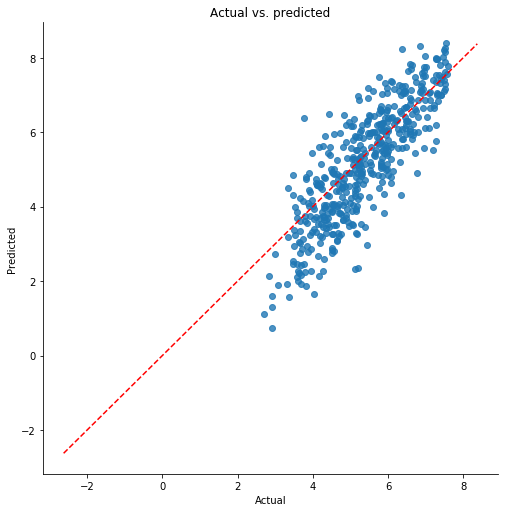

In [10]:
linear_assumption(fit4, x4, y)

It appears that this assumption is satisfied. Although the reiduals have some spread about the regression line, this spread looks linear and fairly parallel to the fitted regression line.

## Assumption 2: Normal Errors

In [11]:
def normal_errors(model, features, dependent):
    '''Checks for normal distribution of error terms via histogram
    '''
    #Calulate Residuals for regression
    results = calculate_residuals(model, features, dependent)
    p1 = plt.figure()
    sns.distplot(results['Residuals'], color = 'blue')

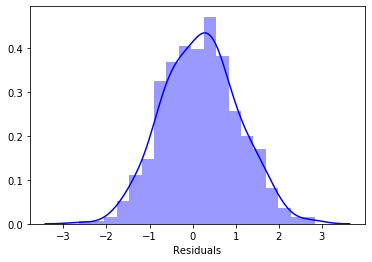

In [12]:
#Check for normal errors for fit4
normal_errors(fit4, x4, y)

This assumption checks out strongly, with the residuals following a nearly perfectly Gaussian Distribution.

## Assumption 3: No Multicollinearity Among Predictors

In [13]:
def multicollinearity_check(features):
    '''Correlation matrix to verfity there is no multicollinearity among
        the predicotors of the model
    '''
    
    corr_matrix = features.corr()
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(corr_matrix, annot=True, linewidths=.5)

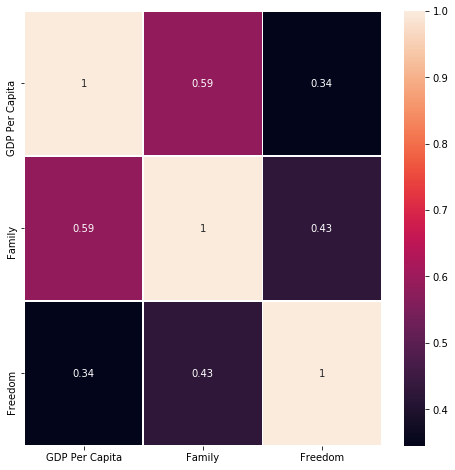

In [14]:
#check for multicollinearity in fit4
multicollinearity_check(x4)

I had a preliminary check for this assumption when develping the model but its always better to be safe the sorry. The highest amount of correlation among the predictors is between Family and GDP Per Capita although it is still below the threshold of 0.70.

## Assumption 4: No Autocorrelation Among Error Terms

In [15]:
def auto_correlation_check(model, low_thresh = 1.5, high_thresh  = 2.5):
    '''Tests for autocorreltion using the Durbin Watson test. Test values 
        between 1.5 and 2.5 are relatively normal
    '''
    
    test = durbin_watson(model.resid)
    if test >= low_thresh and test <= high_thresh:
        print('Assumption verified.\n Durbin Watson test statistic =', test)
    else:
        print('Autocorrrelation present among error terms.')

In [16]:
#check for autocorrelation in fit4
auto_correlation_check(fit4)

Assumption verified.
 Durbin Watson test statistic = 1.500067910952225


The Durbin-Watson test for auto correlation among error terms is based off the assumption that each observation is observed at equally spaced time periods. Since the datasets that were concatenated during the data preperation process were from three consectutive years, I found that the Durbin-Wtason test would be a good fit to test for auto correlation among the error terms of this model. I also ran followed the rule of thumb that test statistic values for the Durbin-Watson test that are within the range of 1.5 and 2.5 are considered to be relatively normal, although these thresholds can be changed within the arguments of the above function. With a test statistic of 1.500006 my model verifies the assumption of no autocorrelation among error terms.

## Assumption 5: Homoscedasticity among error terms

In [17]:
def homoscedasticity_check(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
     
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
    plt.title('Scatter Plot of Residuals')
    plt.show()

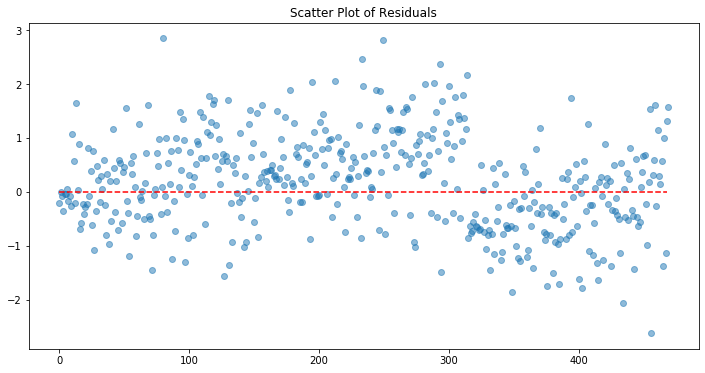

In [18]:
#check for homoscedasticity in fit4
homoscedasticity_check(fit4, x4, y)

The plot above shows that the residuals appear fairly uniform around zero, they do exhbit a slight parabolic curve but I believe the petiteness of this variance from normal should not cause a problem in verifying this assumption.

# Summary
It appears that the main factors that contribute to an individuals happiness are the GDP Per Capita of the country they are living in, the quality of said person's family, and the amount of freedom they have. So, if you're feeling down, move to a free country with with a strong economy, and improve your relationships within your family.